Step 1 : 

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.  
ID- A unique ID to identify a candidate

Salary- Annual CTC oﬀered to the candidate (in INR)

DOJ- Date of joining the company

DOL- Date of leaving the company

Designation- Designation oﬀered in the job

JobCity- Location of the job (city)

Gender- Candidate’s gender

DOB- Date of birth of candidate

10percentage-Overall marks obtained in grade 10 examinations

10board- The school board whose curriculum the candidate followed in grade 10

12graduation- Year of graduation - senior year high school

12percentage-  Overall marks obtained in grade 12 examinations

12board- The school board whose curriculum the candidate followed in grade 12

CollegeID- Unique ID identifying the college which the candidate attended

CollegeTier- Tier of college

Degree- Degree obtained/pursued by the candidate

Specialization- Specialization pursued by the candidate

CollegeGPA- Aggregate GPA at graduation

CollegeCityID- A unique ID to identify the city in which the college is located in

CollegeCityTier- The tier of the city in which the college is located

CollegeState- Name of States

GraduationYear- Year of graduation (Bachelor’s degree)

English- Scores in AMCAT English section

Logical- Scores in AMCAT Logical section

Quant- Scores in AMCAT Quantitative section

Domain- Scores in AMCAT’s domain module

ComputerProgramming- Score in AMCAT’s Computer programming section

ElectronicsAndSemicon- Score in AMCAT’s Electronics & Semiconductor Engineering section

ComputerScience- Score in AMCAT’s Computer Science section

MechanicalEngg- Score in AMCAT’s Mechanical Engineering section

ElectricalEngg- Score in AMCAT’s Electrical Engineering section

TelecomEngg- Score in AMCAT’s Telecommunication Engineering section

CivilEngg- Score in AMCAT’s Civil Engineering section

conscientiousness- Scores in one of the sections of AMCAT’s personality test

agreeableness- Scores in one of the sections of AMCAT’s personality test

extraversion- Scores in one of the sections of AMCAT’s personality test

neuroticism- Scores in one of the sections of AMCAT’s personality test

openess_to_experience- Scores in one of the sections of AMCAT’s personality test


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import style
style.use('ggplot')
import statsmodels.graphics.gofplots as sm
import plotly.express as px
import random
import statistics
from scipy.stats import norm

Step 2 :

In [2]:
df = pd.read_csv('task_10_data.csv')

In [116]:
pd.set_option('display.max_columns',39)

In [117]:
df.head()

Unnamed: 0      ID     Salary               DOJ               DOL  \
0      train  203097   420000.0  01-06-2012 00:00           present   
1      train  579905   500000.0  01-09-2013 00:00           present   
2      train  810601   325000.0  01-06-2014 00:00           present   
3      train  267447  1100000.0  01-07-2011 00:00           present   
4      train  343523   200000.0  01-03-2014 00:00  01-03-2015 00:00   

                Designation    JobCity Gender               DOB  10percentage  \
0   senior quality engineer  Bangalore      f  19-02-1990 00:00          84.3   
1         assistant manager     Indore      m  04-10-1989 00:00          85.4   
2          systems engineer    Chennai      f  03-08-1992 00:00          85.0   
3  senior software engineer    Gurgaon      m  05-12-1989 00:00          85.6   
4                       get    Manesar      m  27-02-1991 00:00          78.0   

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap          2007          95.8   
1                            cbse          2007          85.0   
2                            cbse          2010          68.2   
3                            cbse          2007          83.6   
4                            cbse          2008          76.8   

                              12board  CollegeID  CollegeTier       Degree  \
0  board of intermediate education,ap       1141            2  B.Tech/B.E.   
1                                cbse       5807            2  B.Tech/B.E.   
2                                cbse         64            2  B.Tech/B.E.   
3                                cbse       6920            1  B.Tech/B.E.   
4                                cbse      11368            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0                       computer engineering       78.00           1141   
1  electronics and communication engineering       70.06           5807   
2                     information technology       70.00             64   
3                       computer engineering       74.64           6920   
4  electronics and communication engineering       73.90          11368   

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0                0  Andhra Pradesh            2011      515      585    525   
1                0  Madhya Pradesh            2012      695      610    780   
2                0   Uttar Pradesh            2014      615      545    370   
3                1           Delhi            2011      635      585    625   
4                0   Uttar Pradesh            2012      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                     -1               -1   
1  0.960603                   -1                    466               -1   
2  0.450877                  395                     -1               -1   
3  0.974396                  615                     -1               -1   
4  0.124502                   -1                    233               -1   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0              -1              -1           -1         -1             0.9737   
1              -1              -1           -1         -1            -0.7335   
2              -1              -1           -1         -1             0.2718   
3              -1              -1           -1         -1             0.0464   
4              -1              -1           -1         -1            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  
0         0.8128        0.5269      1.35490                -0.4455  
1         0.3789        1.2396     -0.10760                 0.8637  
2         1.7109        0.1637     -0.86820                 0.6721  
3         0.3448       -0.3440     -0.40780                -0.9194  
4        -0.2793   

In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [6]:
df.tail(7)

Unnamed: 0      ID    Salary               DOJ               DOL  \
3991      train  230873  630000.0  01-07-2011 00:00  01-10-2014 00:00   
3992      train  344407  800000.0  01-04-2014 00:00  01-04-2015 00:00   
3993      train   47916  280000.0  01-10-2011 00:00  01-10-2012 00:00   
3994      train  752781  100000.0  01-07-2013 00:00  01-07-2013 00:00   
3995      train  355888  320000.0  01-07-2013 00:00           present   
3996      train  947111  200000.0  01-07-2014 00:00  01-01-2015 00:00   
3997      train  324966  400000.0  01-02-2013 00:00           present   

                      Designation           JobCity Gender               DOB  \
3991              systems analyst         Bangalore      m  20-05-1990 00:00   
3992                      manager            Rajkot      m  22-06-1990 00:00   
3993            software engineer        New Delhi       m  15-04-1987 00:00   
3994             technical writer         Hyderabad      f  27-08-1992 00:00   
3995  associate software engineer         Bangalore      m  03-07-1991 00:00   
3996           software developer  Asifabadbanglore      f  20-03-1992 00:00   
3997      senior systems engineer           Chennai      f  26-02-1991 00:00   

      10percentage  ... ComputerScience  MechanicalEngg  ElectricalEngg  \
3991         80.00  ...              -1              -1              -1   
3992         73.00  ...              -1              -1              -1   
3993         52.09  ...              -1              -1              -1   
3994         90.00  ...              -1              -1              -1   
3995         81.86  ...              -1              -1              -1   
3996         78.72  ...             438              -1              -1   
3997         70.60  ...              -1              -1              -1   

     TelecomEngg  CivilEngg  conscientiousness agreeableness extraversion  \
3991         393         -1            -1.3447        0.5008      -1.6502   
3992          -1        480             0.3555       -0.9033       0.9623   
3993          -1         -1            -0.1082        0.3448       0.2366   
3994          -1         -1            -0.3027        0.8784       0.9322   
3995          -1         -1            -1.5765       -1.5273      -1.5051   
3996          -1         -1            -0.1590        0.0459      -0.4511   
3997          -1         -1            -1.1128       -0.2793      -0.6343   

      nueroticism  openess_to_experience  
3991     -0.05520                 0.0284  
3992      0.64983                -0.4229  
3993      0.64980                -0.9194  
3994      0.77980                -0.0943  
3995     -1.31840                -0.7615  
3996     -0.36120                -0.0943  
3997      1.32553                -0.6035  

[7 rows x 39 columns]

In [7]:
df.describe()

ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...      3998.000000     3998.000000     3998.000000  3998.000000   
mean   ...        90.742371       22.974737       16.478739    31.851176   
std    ...       175.273083       98.123311       87.585634   104.852845   
min    ...        -1.000000       -1.000000       -1.000000    -1.000000   
25%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
50%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
75%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
max    ...       715.000000      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
std       1.007580               1.008075  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  

[8 rows x 27 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [9]:
df.shape

(3998, 39)

In [10]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [11]:
df.corr()

ID    Salary  10percentage  12graduation  \
ID                     1.000000 -0.247294      0.044547      0.673102   
Salary                -0.247294  1.000000      0.177373     -0.161383   
10percentage           0.044547  0.177373      1.000000      0.269957   
12graduation           0.673102 -0.161383      0.269957      1.000000   
12percentage           0.007069  0.170254      0.643378      0.259166   
CollegeID              0.284540 -0.118690      0.021082      0.254021   
CollegeTier            0.035160 -0.179332     -0.126042      0.027691   
collegeGPA             0.047144  0.130103      0.312538      0.086001   
CollegeCityID          0.284540 -0.118690      0.021082      0.254021   
CollegeCityTier       -0.035977  0.015384      0.116707     -0.003016   
GraduationYear         0.027539 -0.010053     -0.013799      0.014457   
English                0.135505  0.178219      0.350780      0.147925   
Logical                0.102215  0.179275      0.316014      0.105887   
Quant                 -0.055134  0.230627      0.317640      0.001379   
Domain                -0.125639  0.104656      0.078563     -0.034163   
ComputerProgramming    0.018859  0.115665      0.053600     -0.047995   
ElectronicsAndSemicon -0.115601  0.000665      0.085179     -0.005891   
ComputerScience        0.482626 -0.100720     -0.018933      0.293439   
MechanicalEngg        -0.026147  0.018475      0.050364      0.035459   
ElectricalEngg         0.104454 -0.047598      0.074419      0.123751   
TelecomEngg           -0.049272 -0.022691      0.049378      0.023470   
CivilEngg             -0.017871  0.037639      0.030002     -0.004727   
conscientiousness      0.175557 -0.064148      0.067657      0.103329   
agreeableness          0.024837  0.057423      0.136645      0.041182   
extraversion           0.120979 -0.010213     -0.004679      0.061956   
nueroticism           -0.146289 -0.054685     -0.132496     -0.074369   
openess_to_experience  0.031359 -0.011312      0.036692     -0.015069   

                       12percentage  CollegeID  CollegeTier  collegeGPA  \
ID                         0.007069   0.284540     0.035160    0.047144   
Salary                     0.170254  -0.118690    -0.179332    0.130103   
10percentage               0.643378   0.021082    -0.126042    0.312538   
12graduation               0.259166   0.254021     0.027691    0.086001   
12percentage               1.000000   0.022336    -0.100771    0.346137   
CollegeID                  0.022336   1.000000     0.067054    0.017240   
CollegeTier               -0.100771   0.067054     1.000000   -0.086781   
collegeGPA                 0.346137   0.017240    -0.086781    1.000000   
CollegeCityID              0.022336   1.000000     0.067054    0.017240   
CollegeCityTier            0.130462   0.007757    -0.101494    0.017471   
GraduationYear            -0.012933  -0.000172    -0.005557    0.008706   
English                    0.212888  -0.022792    -0.183843    0.106478   
Logical                    0.243571  -0.047094    -0.182811    0.196610   
Quant                      0.312413  -0.114672    -0.251103    0.217380   
Domain                     0.074099  -0.073857    -0.061436    0.107252   
ComputerProgramming        0.080818  -0.033760    -0.073644    0.136596   
ElectronicsAndSemicon      0.117112  -0.020438    -0.031573    0.029855   
ComputerScience           -0.043534   0.102303     0.001053    0.007601   
MechanicalEngg             0.037635  -0.009291    -0.021548   -0.031765   
ElectricalEngg             0.064001   0.022933     0.002594    0.052258   
TelecomEngg                0.044201   0.025620     0.000007   -0.005226   
CivilEngg                  0.005910   0.005749    -0.033722   -0.018950   
conscientiousness          0.058299   0.076432     0.055174    0.069582   
agreeableness              0.103998  -0.005264    -0.038055    0.068282   
extraversion              -0.007486   0.005917     0.009970   -0.032684   
nueroticism               -0.09436

Dropping the Unnamed: 0 column as it has no significance and only contains Train.

In [12]:
df_new = df.drop('Unnamed: 0', axis=1)

In [13]:
df_new

ID     Salary               DOJ               DOL  \
0     203097   420000.0  01-06-2012 00:00           present   
1     579905   500000.0  01-09-2013 00:00           present   
2     810601   325000.0  01-06-2014 00:00           present   
3     267447  1100000.0  01-07-2011 00:00           present   
4     343523   200000.0  01-03-2014 00:00  01-03-2015 00:00   
...      ...        ...               ...               ...   
3993   47916   280000.0  01-10-2011 00:00  01-10-2012 00:00   
3994  752781   100000.0  01-07-2013 00:00  01-07-2013 00:00   
3995  355888   320000.0  01-07-2013 00:00           present   
3996  947111   200000.0  01-07-2014 00:00  01-01-2015 00:00   
3997  324966   400000.0  01-02-2013 00:00           present   

                      Designation           JobCity Gender               DOB  \
0         senior quality engineer         Bangalore      f  19-02-1990 00:00   
1               assistant manager            Indore      m  04-10-1989 00:00   
2                systems engineer           Chennai      f  03-08-1992 00:00   
3        senior software engineer           Gurgaon      m  05-12-1989 00:00   
4                             get           Manesar      m  27-02-1991 00:00   
...                           ...               ...    ...               ...   
3993            software engineer        New Delhi       m  15-04-1987 00:00   
3994             technical writer         Hyderabad      f  27-08-1992 00:00   
3995  associate software engineer         Bangalore      m  03-07-1991 00:00   
3996           software developer  Asifabadbanglore      f  20-03-1992 00:00   
3997      senior systems engineer           Chennai      f  26-02-1991 00:00   

      10percentage                         10board  ...  ComputerScience  \
0            84.30  board ofsecondary education,ap  ...               -1   
1            85.40                            cbse  ...               -1   
2            85.00                            cbse  ...               -1   
3            85.60                            cbse  ...               -1   
4            78.00                            cbse  ...               -1   
...            ...                             ...  ...              ...   
3993         52.09                            cbse  ...               -1   
3994         90.00                     state board  ...               -1   
3995         81.86                      bse,odisha  ...               -1   
3996         78.72                     state board  ...              438   
3997         70.60                            cbse  ...               -1   

      MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg conscientiousness  \
0                 -1             -1           -1         -1            0.9737   
1                 -1             -1           -1         -1           -0.7335   
2                 -1             -1           -1         -1            0.2718   
3                 -1             -1           -1         -1            0.0464   
4                 -1             -1           -1         -1           -0.8810   
...              ...            ...          ...        ...               ...   
3993              -1             -1           -1         -1           -0.1082   
3994              -1             -1           -1         -1           -0.3027   
3995              -1             -1           -1         -1           -1.5765   
3996              -1             -1           -1         -1           -0.1590   
3997              -1             -1           -1         -1           -1.1128   

     agreeableness  extraversion  nueroticism  openess_to_experience  
0           0.8128        0.5269      1.35490                -0.4455  
1           0.3789        1.2396     -0.10760                 0.8637  
2           1.7109        0.1637     -0.86820                 0.6721  
3           0.3448       -0.3440     -0.40780                -0.9194  
4          -0.2793       -1.0697      0.09163      

STEP : 3

Univariate Analysis : 

In [14]:
def plots(feature):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    sns.distplot(feature,kde = True)
    plt.subplot(1,2,2)
    sns.boxplot(feature)
    sm.ProbPlot(feature).qqplot(line = 's')

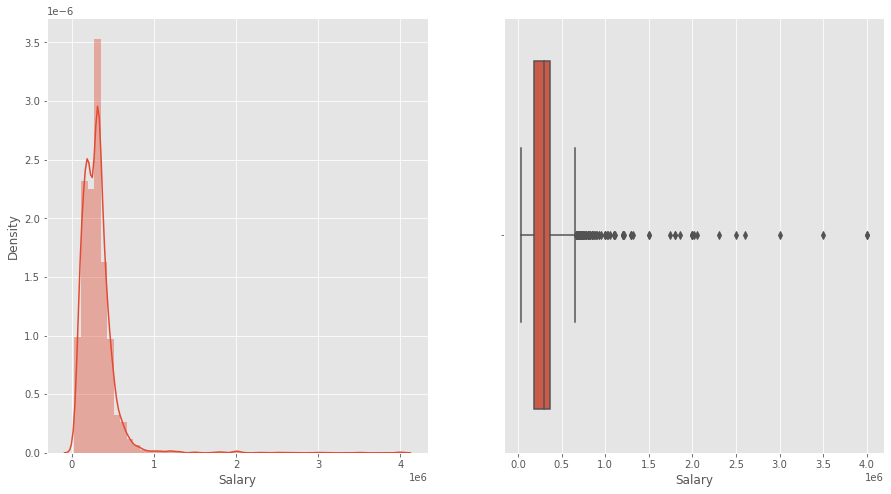

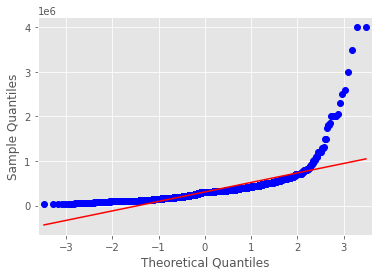

In [15]:
plots(df_new.Salary)

observations :

1. salary column has max:4,000,000
2. salary column has min: min:35,000
3. salary column has 53 Outliers Found.
4. salary column is Skewed : 6.45 (highly skewed)
5. salary column has a Kurtosis of : 80.93 (leptokurtic)

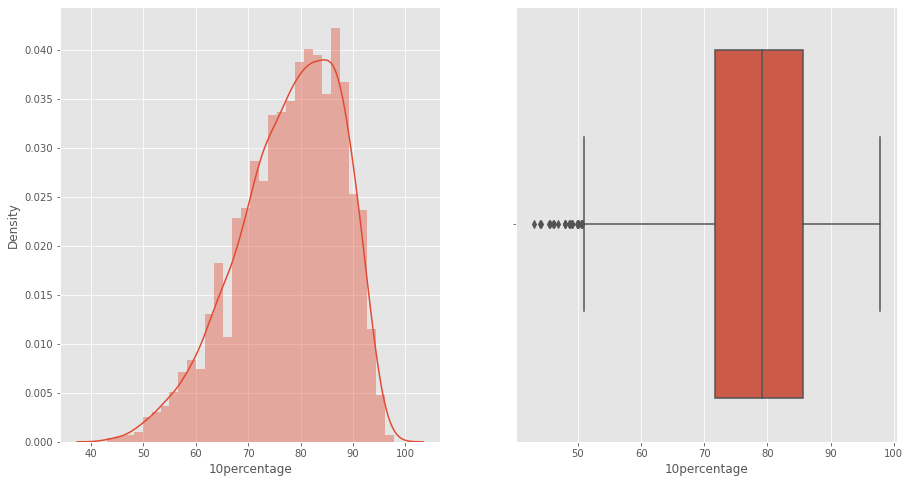

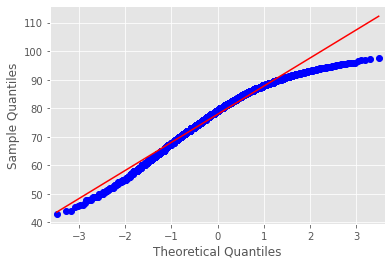

In [16]:
plots(df_new['10percentage'])

observations :
1. Found 17 Outliers.
2. max percentage : 97.76
3. min percentage : 43
4. Skew : -0.59 (moderately skewed)
5. Kurtosis : -0.11 (platykurtic)

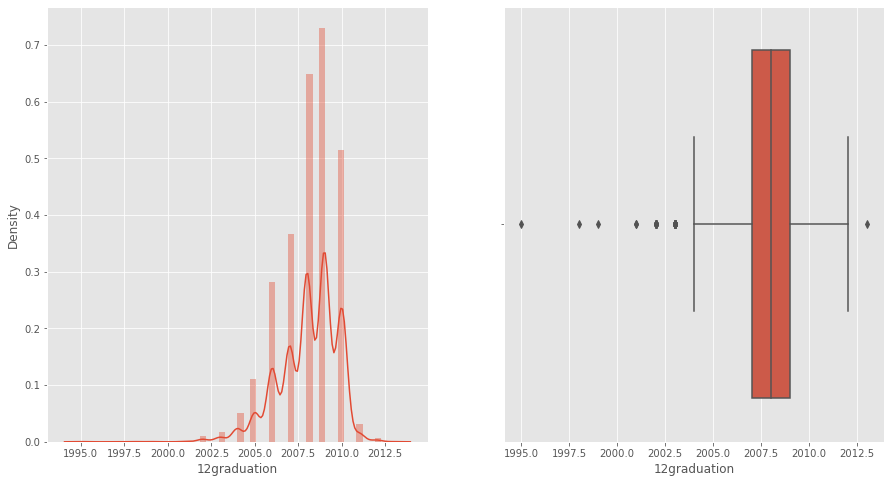

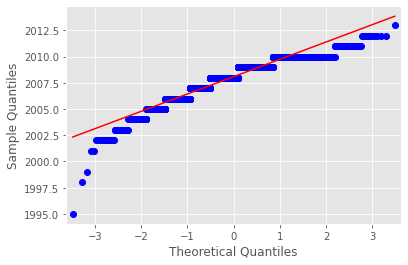

In [17]:
plots(df_new['12graduation'])

observations :

1. Found 7 Outliers.
2. max value : 2013
3. min value : 1995
4. Skew : -0.96 (moderately skewed)
5. Kurtosis : 1.95(platykurtic)

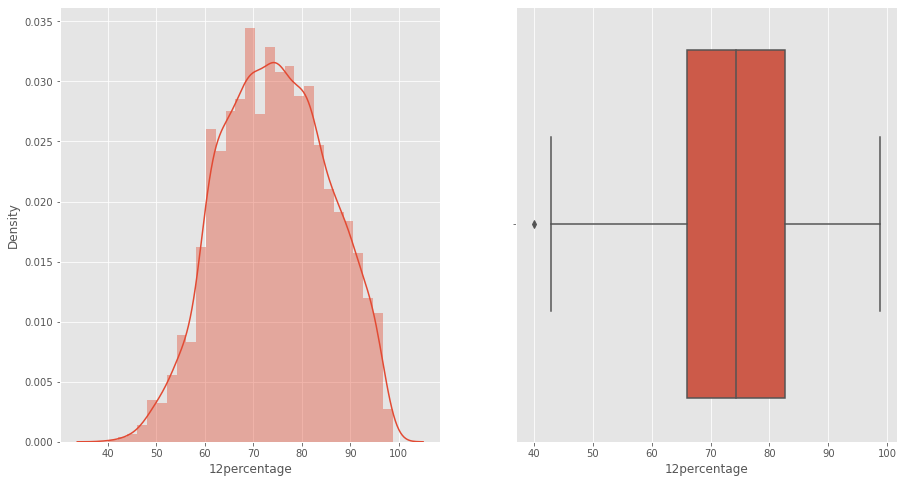

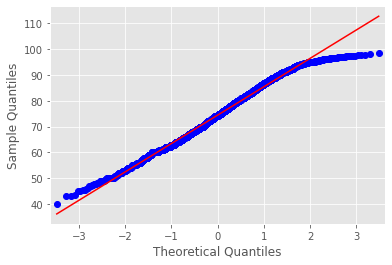

In [18]:
plots(df_new['12percentage'])

observations :

1. Found 1 Outliers.
2. max value : 40
3. min value : 98.7
4. Skew : -0.03(fairly symmetrical)
5. Kurtosis : -0.63(platykurtic)

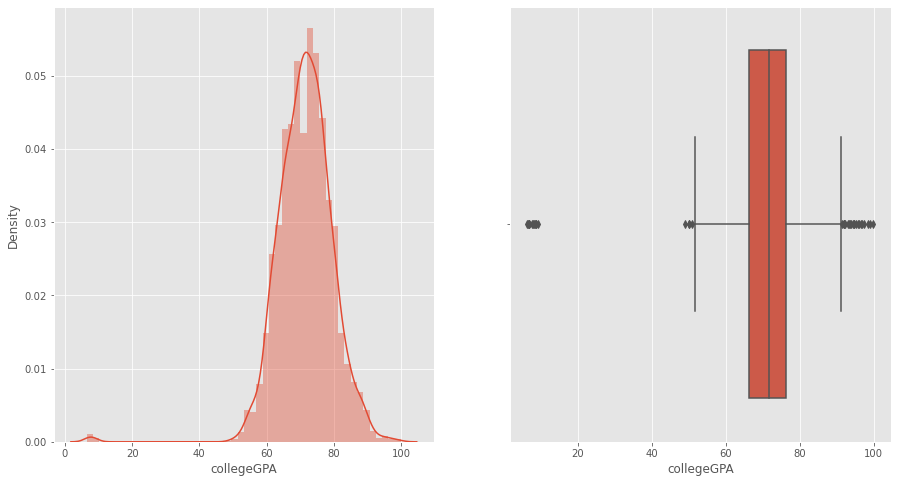

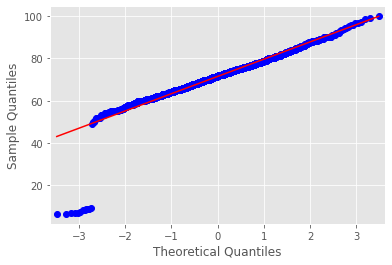

In [19]:
plots(df_new.collegeGPA)

observations :

1. Found 35 Outliers.
2. max value : 9.9
3. min value : 6.45
4. Skew : -1.25 (highly skewed)
5. Kurtosis : 10.23 (leptokurtic)

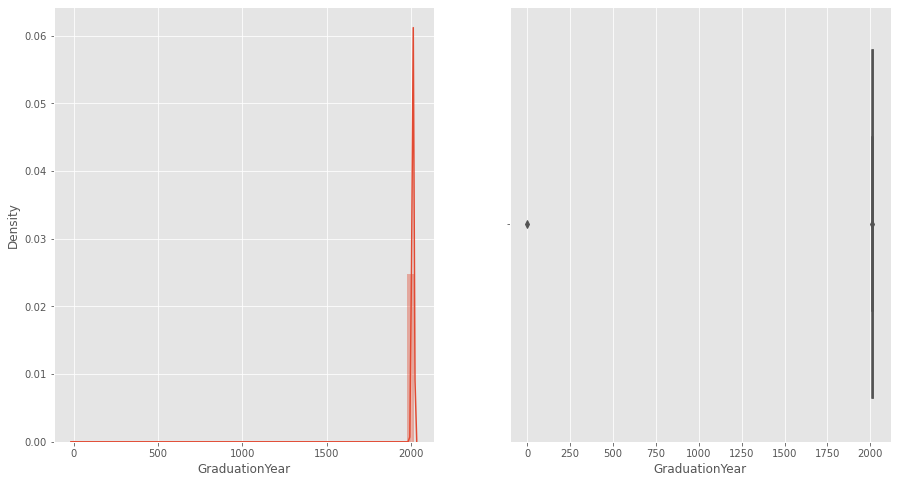

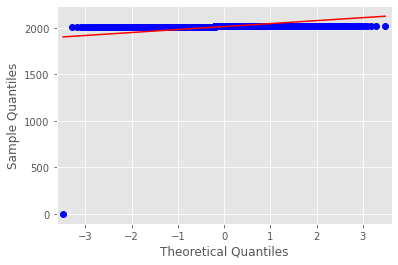

In [20]:
plots(df_new.GraduationYear)

observations :

1. Found 2 Outliers.
2. max value : 2017
3. min value : 0
4. Skew : -63.07 (highly skewed)
5. Kurtosis : 3984.37 (leptokurtic)

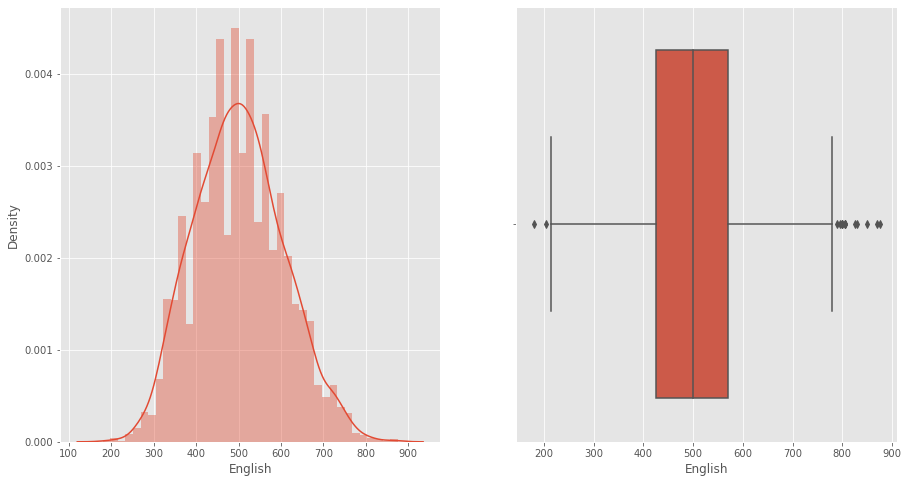

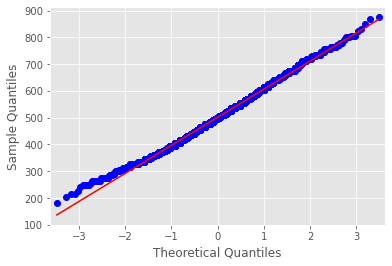

In [21]:
plots(df_new.English)

observations :

1. Found 11 Outliers.
2. max value : 875
3. min value : 180
4. Skew : 0.19 (fairly symmetrical)
5. Kurtosis : -0.25 (platykurtic)

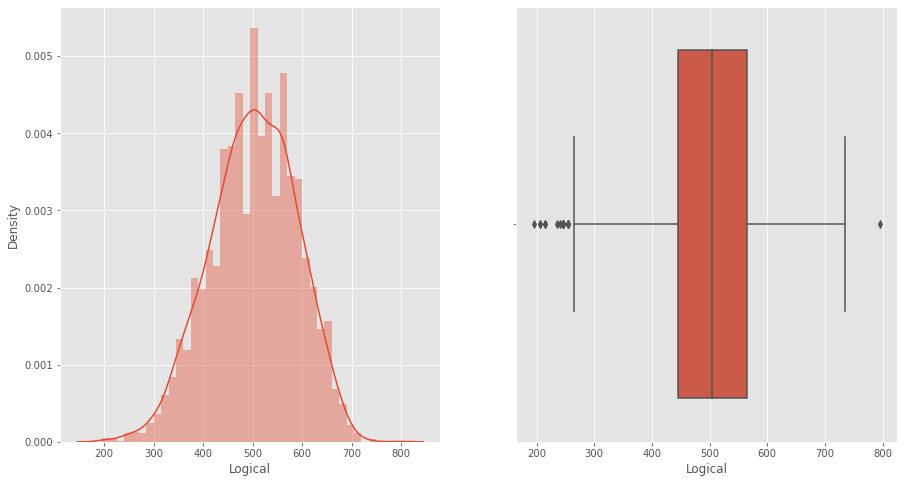

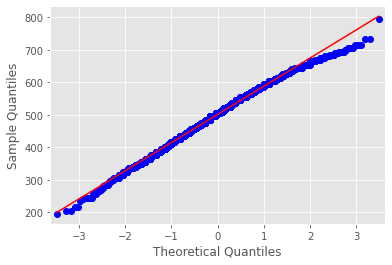

In [22]:
plots(df_new.Logical)

observations :

1. Found 8 Outliers.
2. max value : 795
3. min value : 195
4. Skew : -0.22 (fairly symmetrical)
5. Kurtosis : -0.22 (platykurtic) 

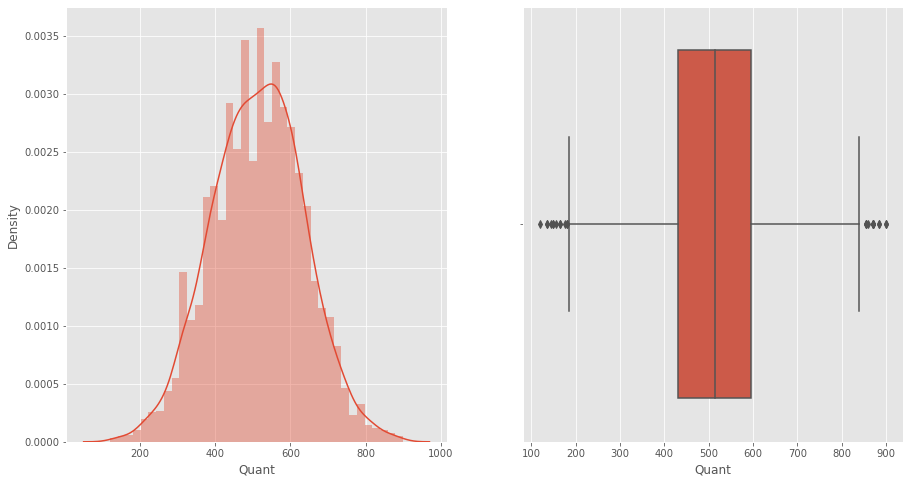

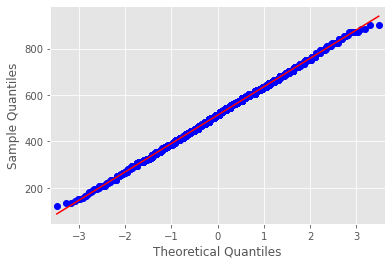

In [23]:
plots(df_new.Quant)

observations :

1. Found 13 Outliers.
2. max value : 900
3. min value : 120
4. Skew : -0.02 (fairly symmetrical) 
5. Kurtosis : -0.1 (platykurtic)

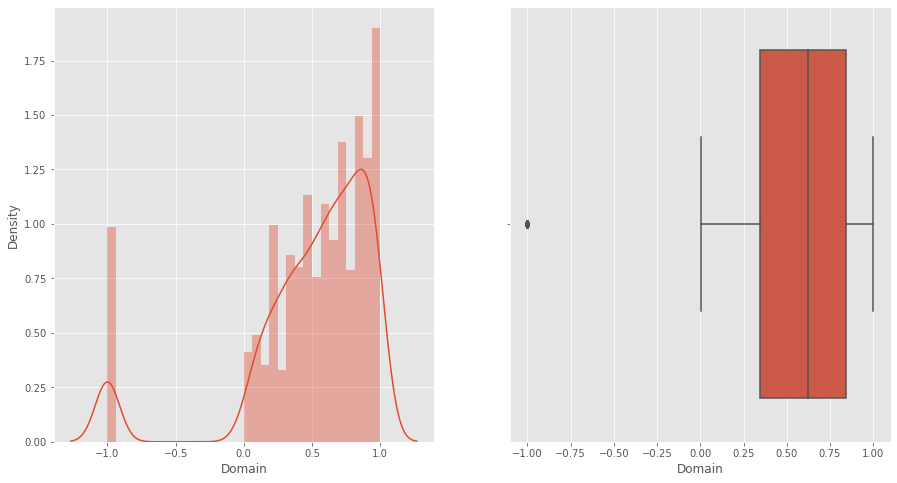

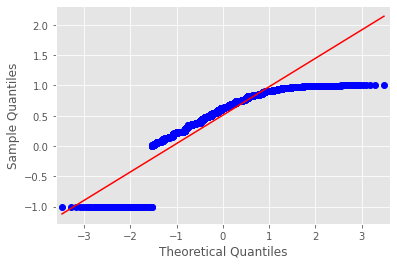

In [24]:
plots(df_new.Domain)

observations :

1. Found 1 Outliers.
2. max value : 0.99
3. min value : -1.0
4. Skew : -1.92 (highly skewed)
5. Kurtosis : 3.9 (leptokurtic)

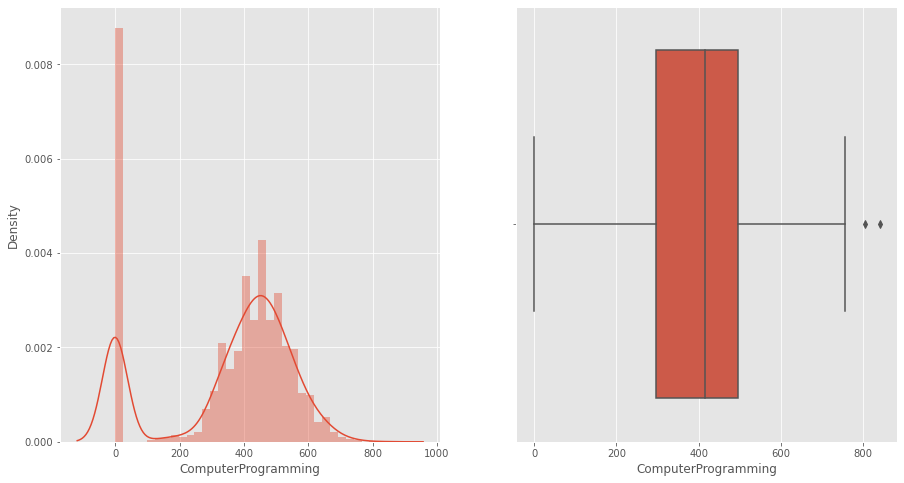

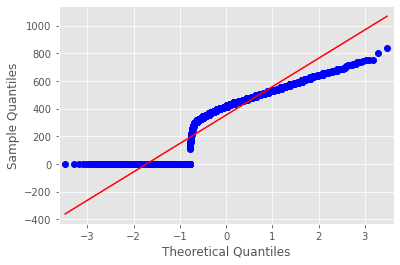

In [25]:
plots(df_new.ComputerProgramming)

observations :

1. Found 2 Outliers.
2. max value : 840
3. min value : -1
4. Skew : -0.78 (moderately skewed)
5. Kurtosis : -0.67 (platykurtic)

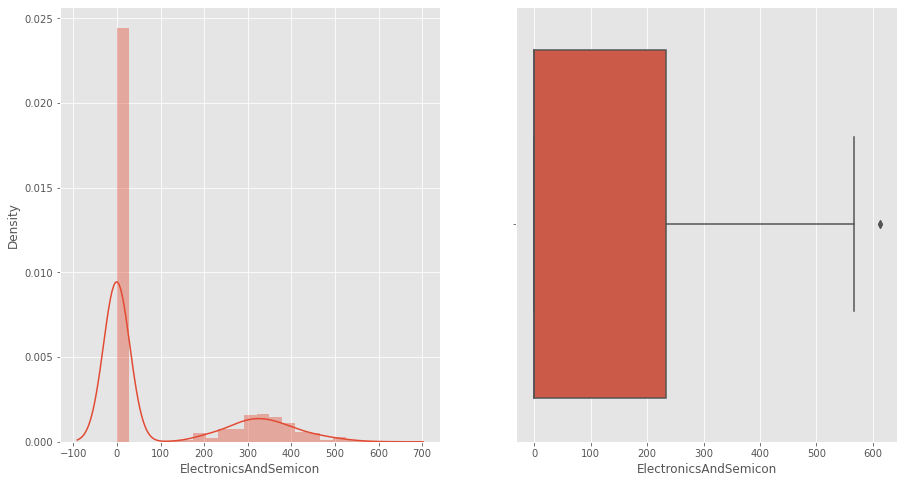

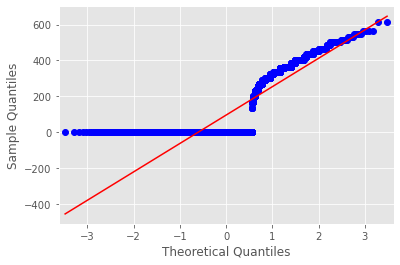

In [26]:
plots(df_new.ElectronicsAndSemicon)

observations :

1. Found 1 Outliers.
2. max value : 612
3. min value : -1
4. Skew : 1.2 (highly skewed)
5. Kurtosis : -0.21 (platykurtic)

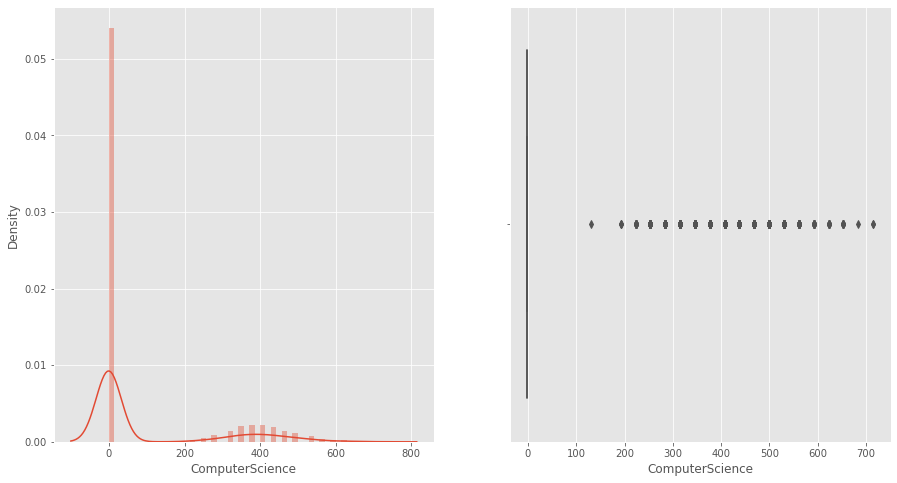

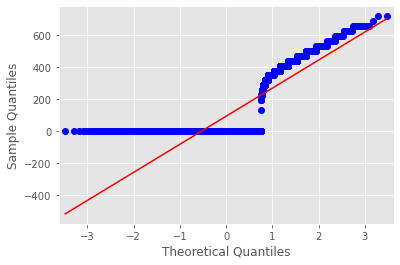

In [27]:
plots(df_new.ComputerScience)

observations :

. Found 19 Outliers.
2. max value : 715 
3. min value : -1
4. Skew : 1.53 (highly skewed)
5. Kurtosis : 0.69 (platykurtic)

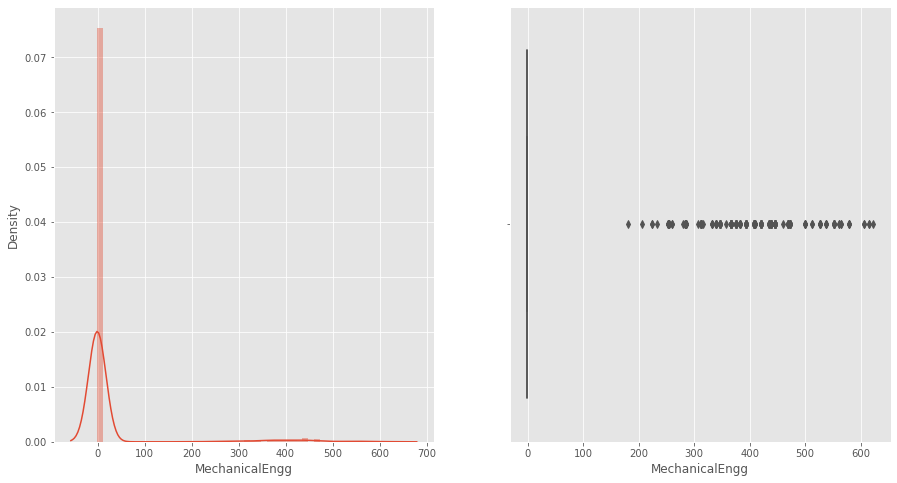

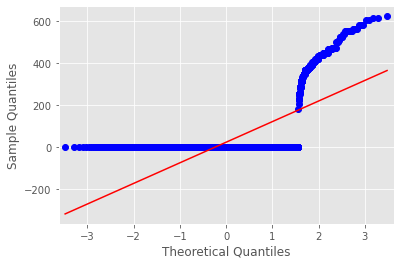

In [28]:
plots(df_new.MechanicalEngg)

observations :

1. Found 41 Outliers.
2. max value : 623 
3. min value : -1
4. Skew : 4.03 (highly skewed)
5. Kurtosis : 15.02 (leptokurtic) 

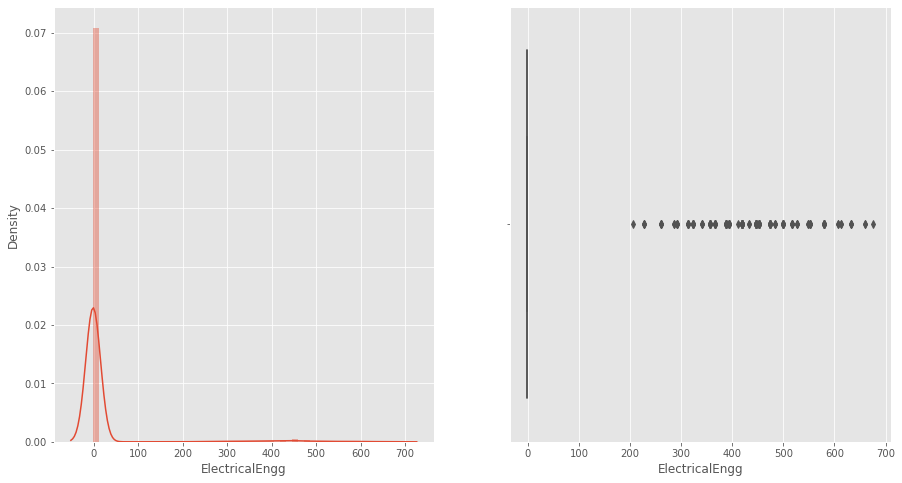

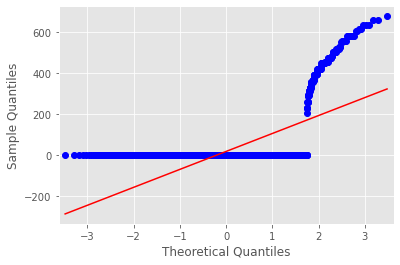

In [29]:
plots(df_new.ElectricalEngg)

observations :

1. Found 30 Outliers.
2. max value : 676
3. min value : -1
4. Skew : 5.06 (highly skewed)
5. Kurtosis : 24.88 (leptokurtic)

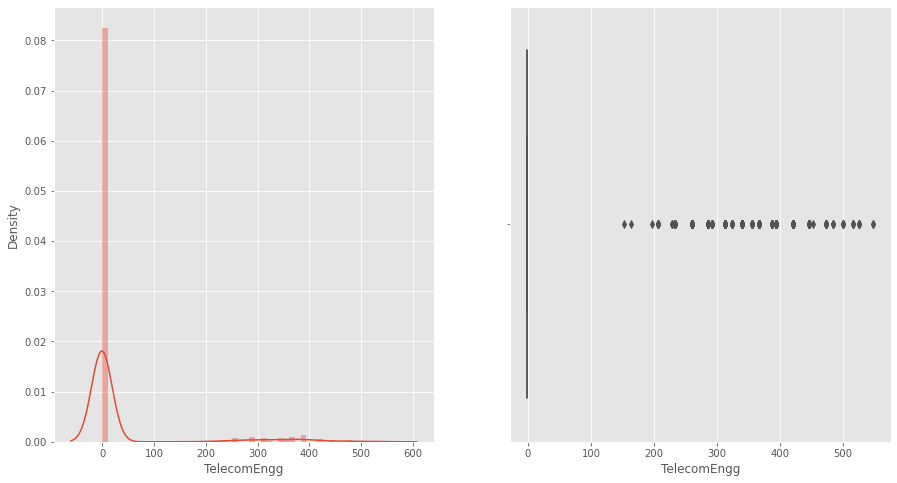

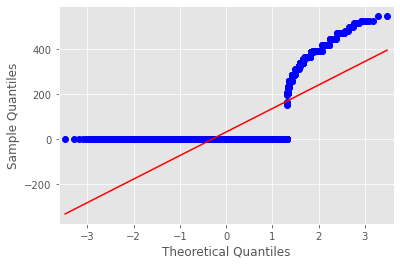

In [30]:
plots(df_new.TelecomEngg)

observations :

1. Found 30 Outliers.
2. max value : 548
3. min value : -1
4. Skew : 3.04 (highly skewed)
5. Kurtosis : 7.81 (leptokurtic)

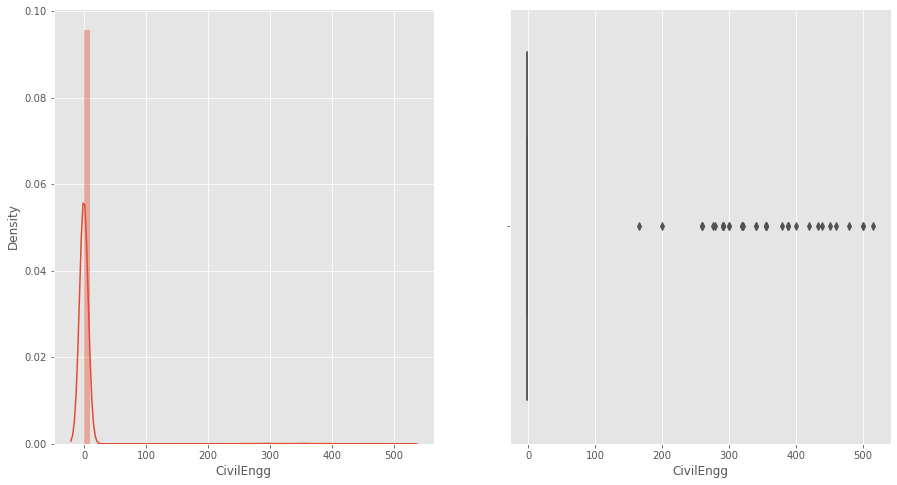

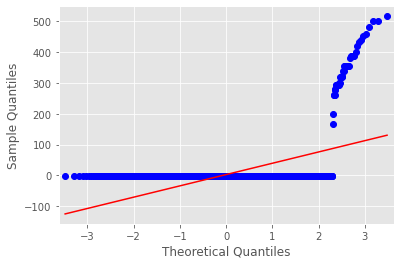

In [31]:
plots(df_new.CivilEngg)

observations :

1. Found 22 Outliers.
2. max value : 516
3. min value : -1
4. Skew : 10.32 (highly skewed)
5. Kurtosis : 109.04 (leptokurtic)

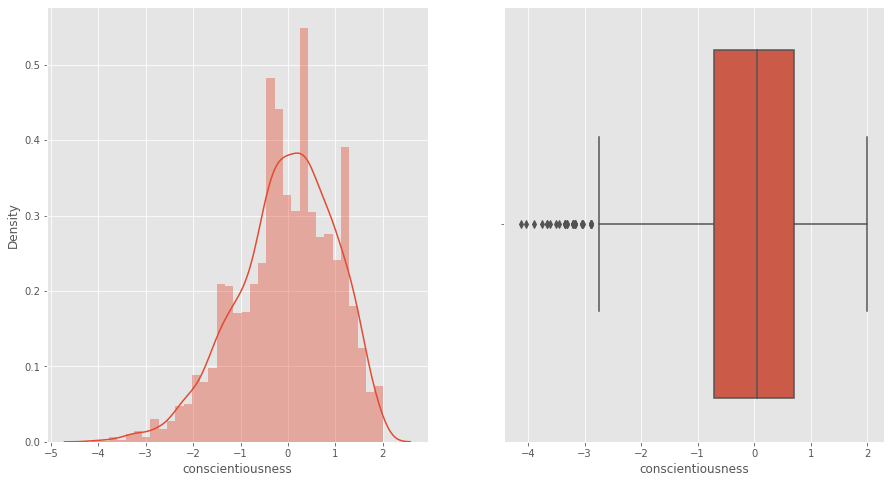

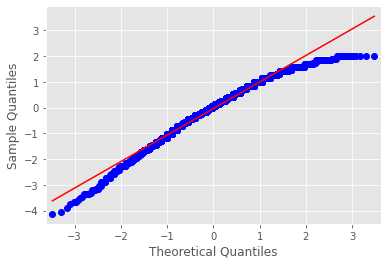

In [32]:
plots(df_new.conscientiousness)

observations :

1. Found 16 Outliers.
2. max value : 1.99
3. min value : -4.1267
4. Skew : -0.53 (moderately skewed)
5. Kurtosis : 0.12 (platykurtic)

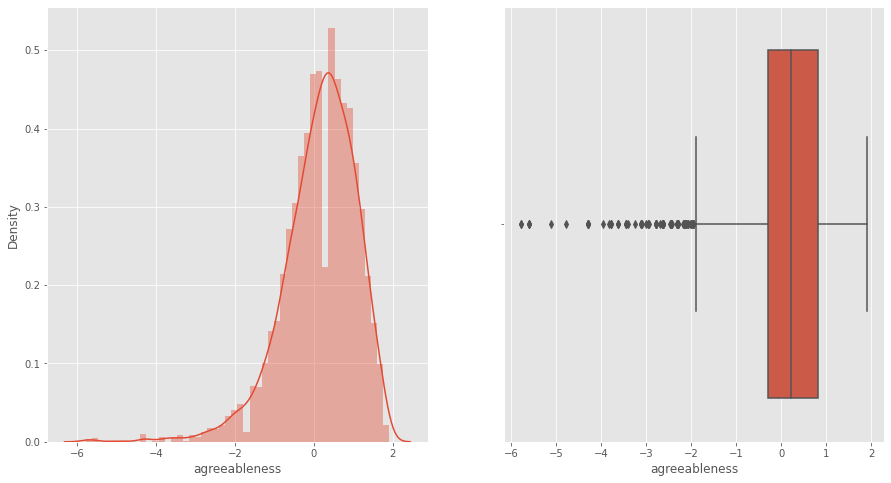

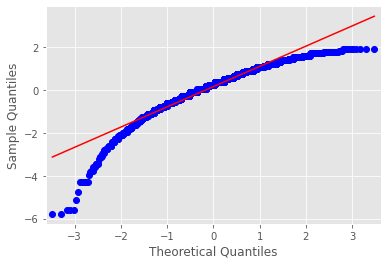

In [33]:
plots(df_new.agreeableness)

observations :

1. Found 35 Outliers.
2. max value : 1.9048
3. min value : -5.7816
4. Skew : -1.2 (highly skewed)
5. Kurtosis : 3.39 (leptokurtic)

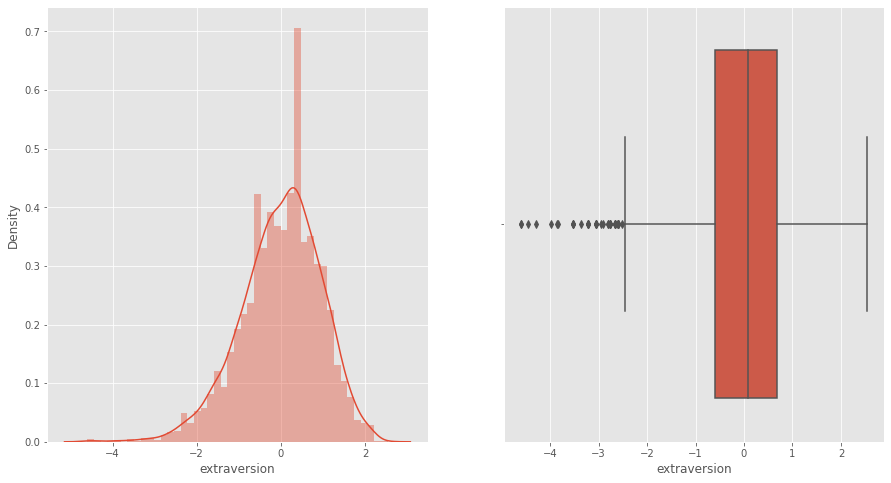

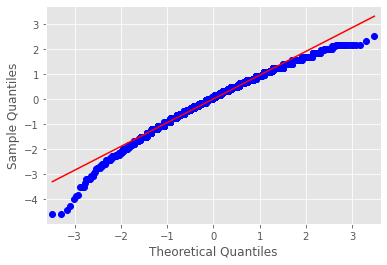

In [34]:
plots(df_new.extraversion)

observations :

1. Found 19 Outliers.
2. max value : 2.5354
3. min value : -4.6009 
4. Skew : -0.52 (moderately skewed)
5. Kurtosis : 0.64 (platykurtic) 

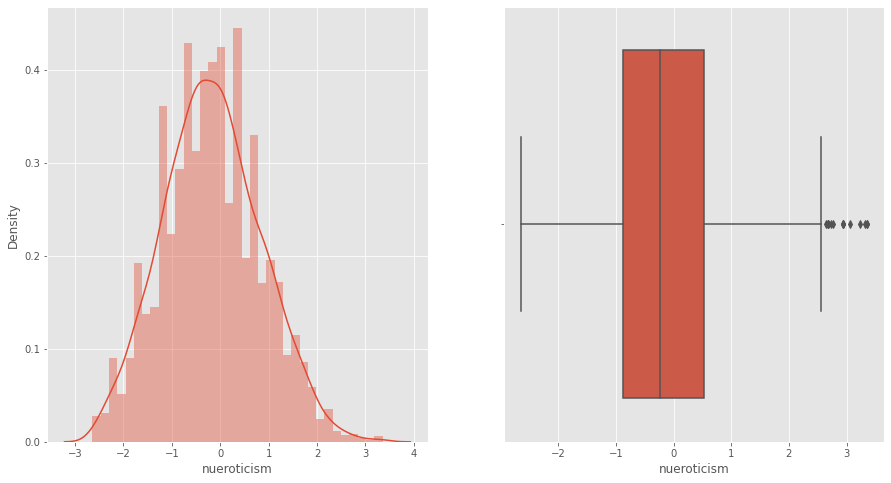

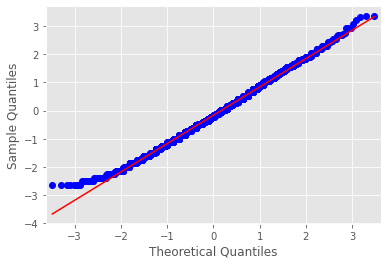

In [35]:
plots(df_new.nueroticism)

observations :

1. Found 9 Outliers.
2. max value : 3.3525
3. min value : -2.643 
4. Skew : 0.17 (fairly symmetrical)
5. Kurtosis : -0.19 (platykurtic) 

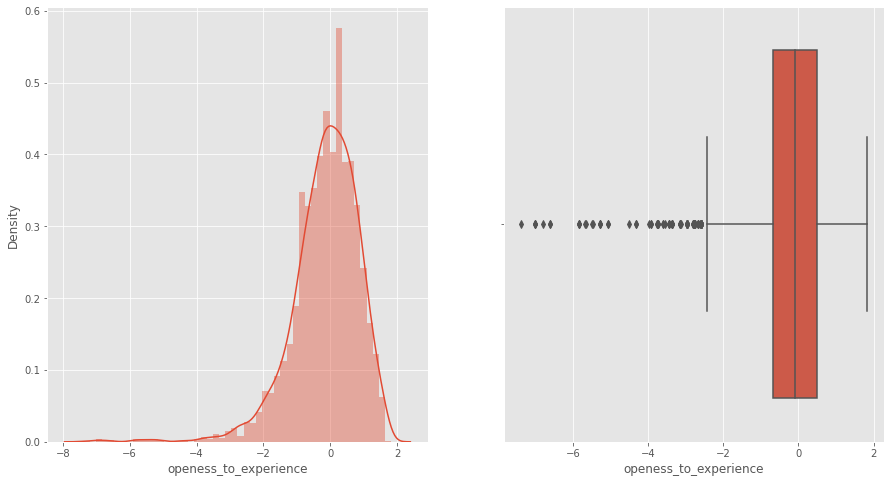

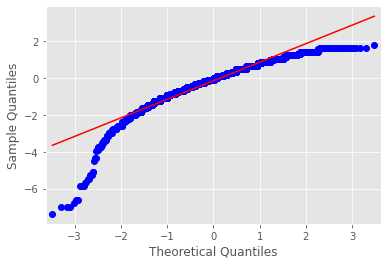

In [36]:
plots(df_new.openess_to_experience)

observations :

1. Found 30 Outliers.
2. max value : 1.8224
3. min value : -7.3757
4. Skew : -1.51 (highly skewed) 
4. Kurtosis : 5.79 (leptokurtic)

<AxesSubplot:xlabel='Gender', ylabel='count'>

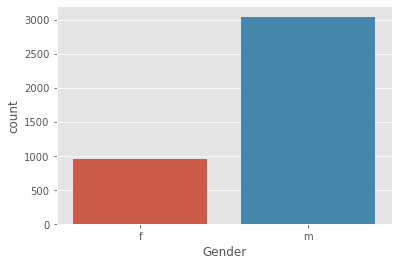

In [37]:
sns.countplot(df_new['Gender'])

observations : 
1. Male count is 3041.
2. Female count is 957.

<AxesSubplot:xlabel='count', ylabel='Designation'>

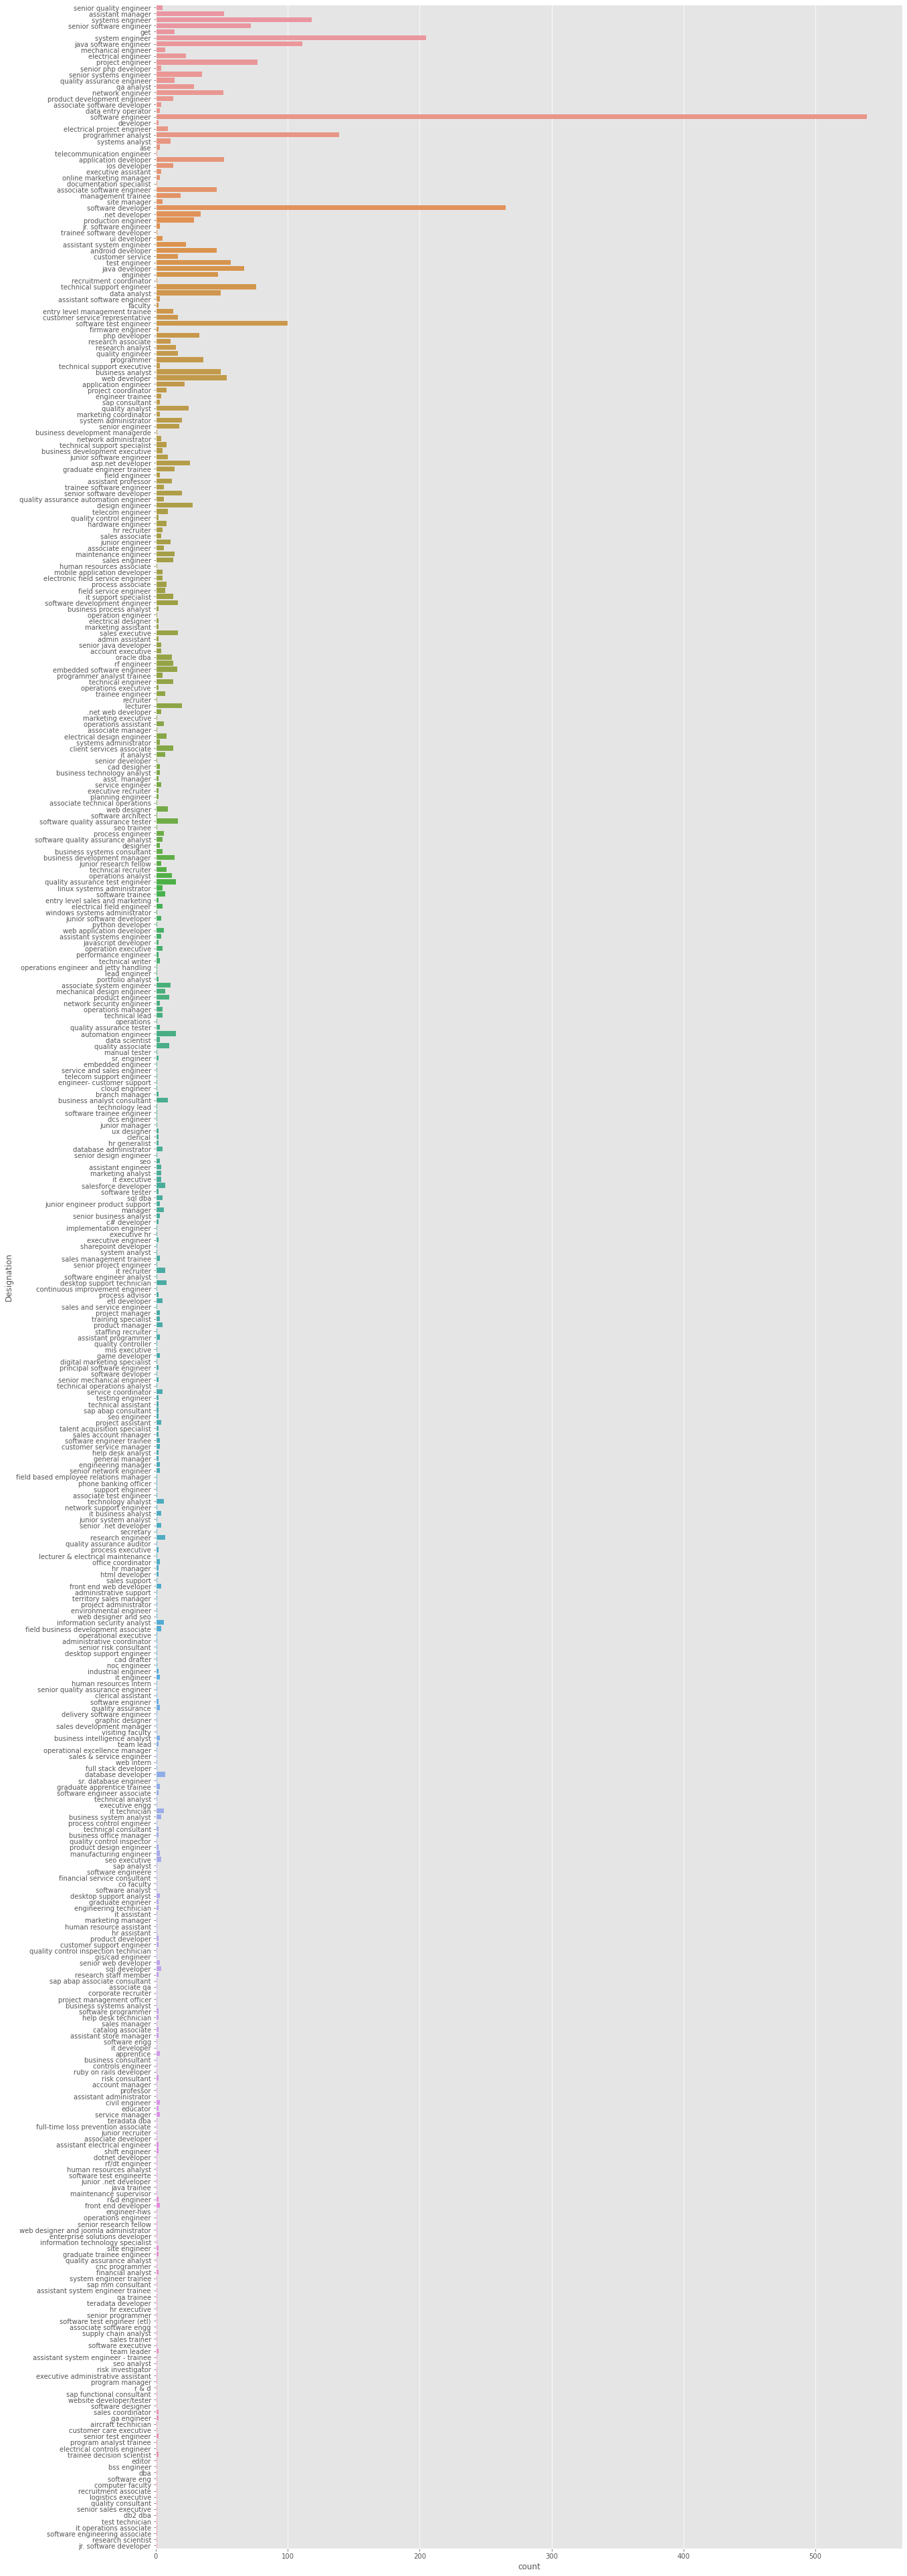

In [38]:
plt.figure(figsize=(20,70))
sns.countplot(y=df_new['Designation'])

1. Highest designation value count is for Software Engineer which is 539.
2. Lowest designation value counts is for Editor,Network support,Web designer,Software analyst,Risk investigator which is 1.

<AxesSubplot:xlabel='count', ylabel='JobCity'>

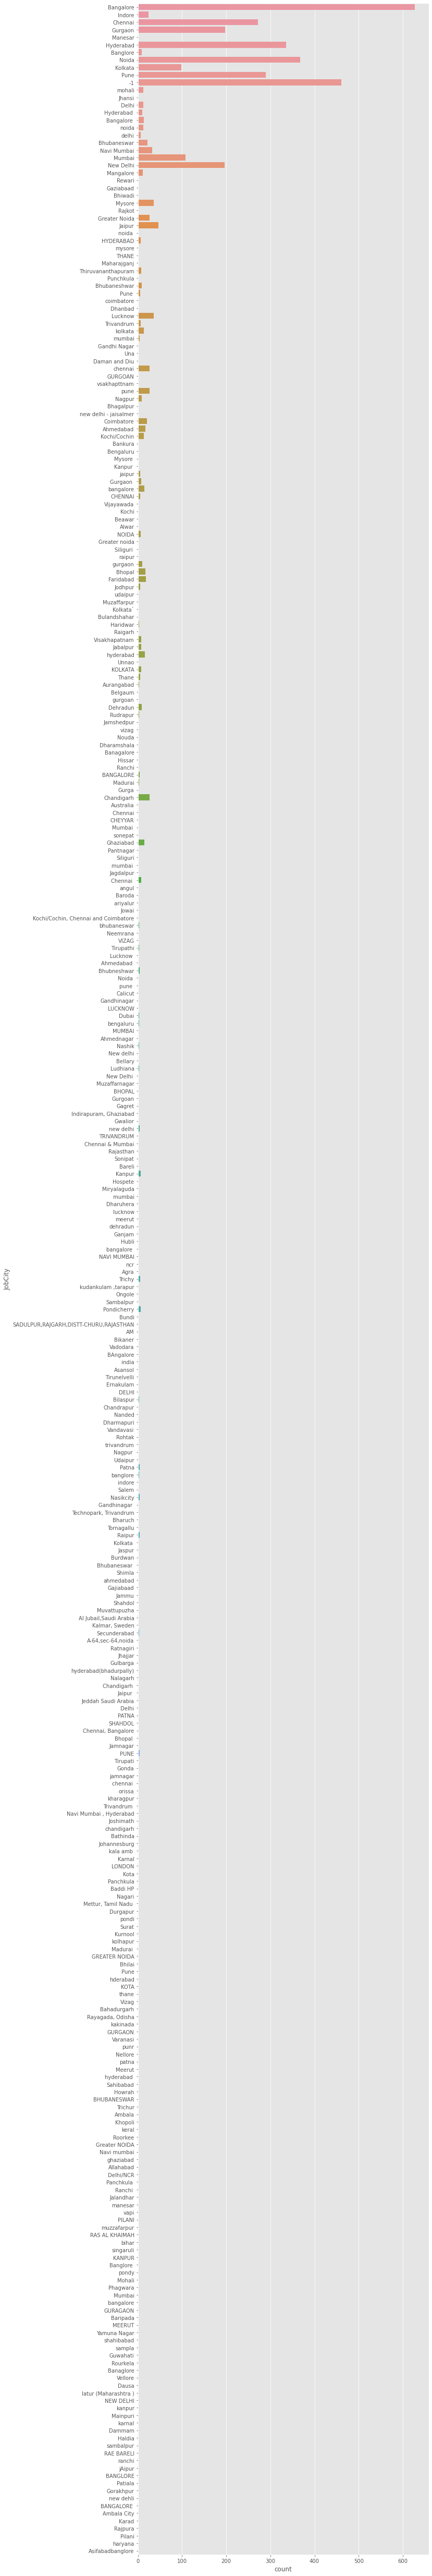

In [39]:
plt.figure(figsize=(10,90))
sns.countplot(y=df_new['JobCity'])

Observations :
1. Highest candidatses placed were in banglore city.

STEP 4:

BI- variate analysis.

In [40]:
def Biplots(param_1,param_2):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    sns.scatterplot(param_1,param_2)
    plt.subplot(1,2,2)
    plt.hexbin(param_1,param_2)
    plt.figure(figsize=(150,10))
    sns.swarmplot(param_1,param_2)

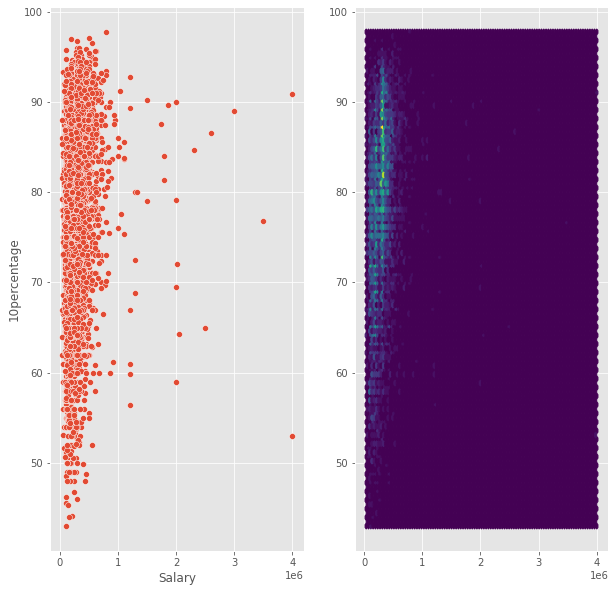

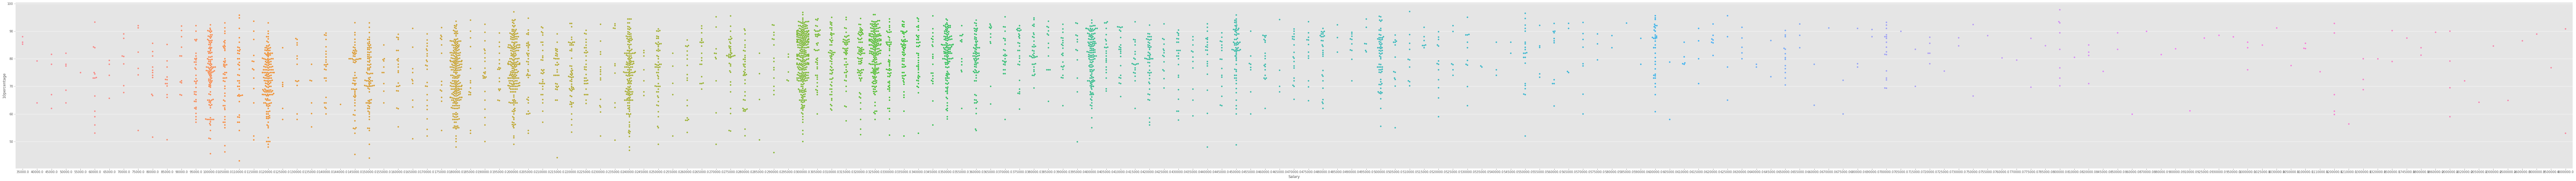

In [41]:
Biplots(df_new['Salary'],df_new['10percentage'])

Observations :


 Most of the salary figure is within 0.8 million for 10th percentage, few exceptions are present in which salary is around 4 milion.

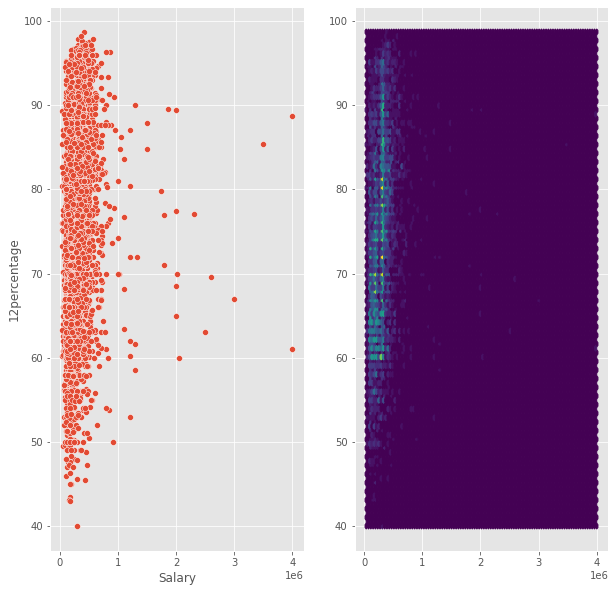

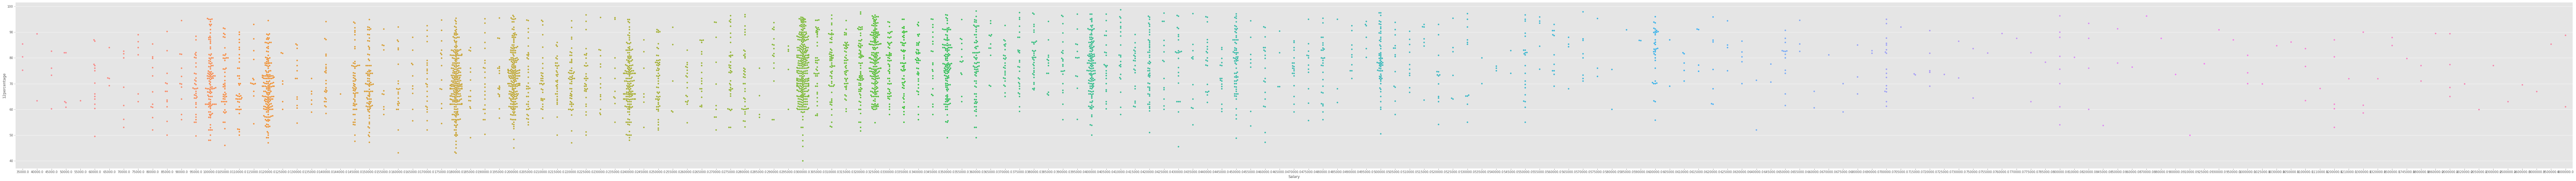

In [42]:
Biplots(df_new['Salary'],df_new['12percentage'])

Observations :

Most of the salary figure is within 0.8 million for 12th percentage, few exceptions are present in which 2 candidate's salary is around 4 milion.

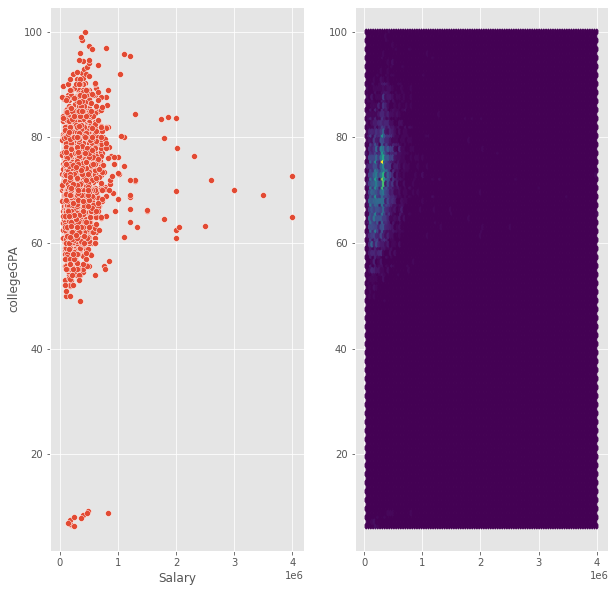

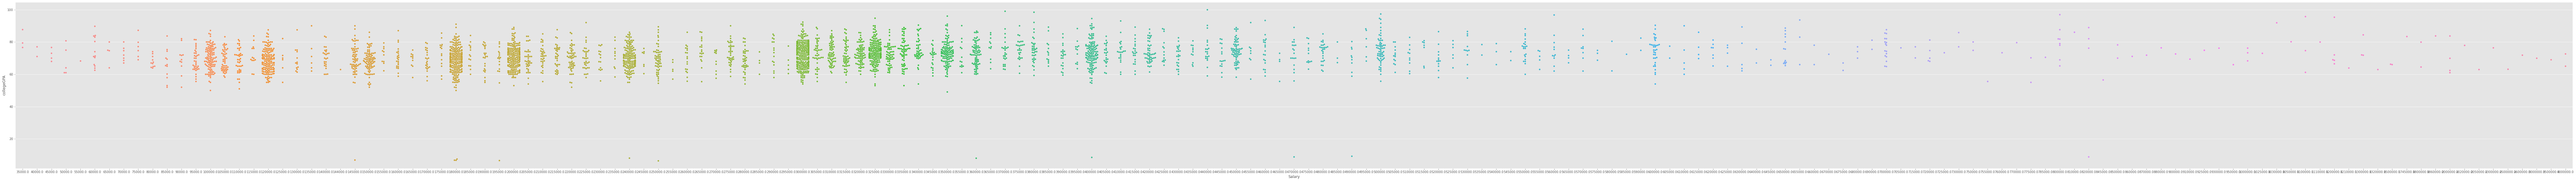

In [43]:
Biplots(df_new['Salary'],df_new['collegeGPA'])

Observations :

Candidates having 40 Gpa have a wide pay scale mostly within 1 million mark, but people who are having Gpa less than 20 are having very low salary around 0.4 million.

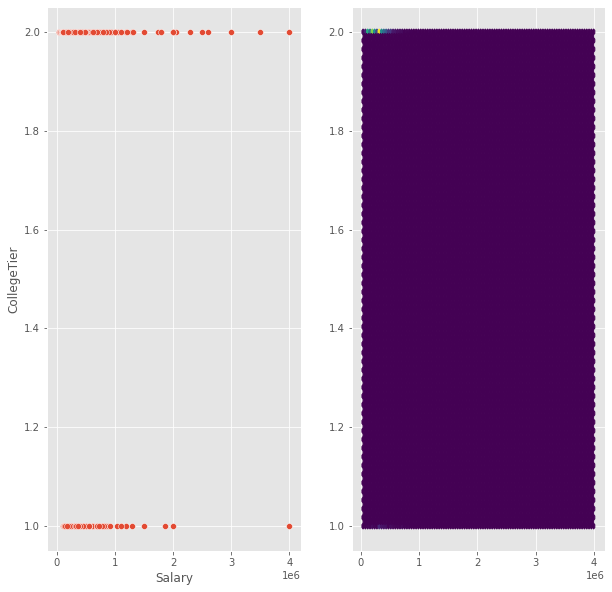

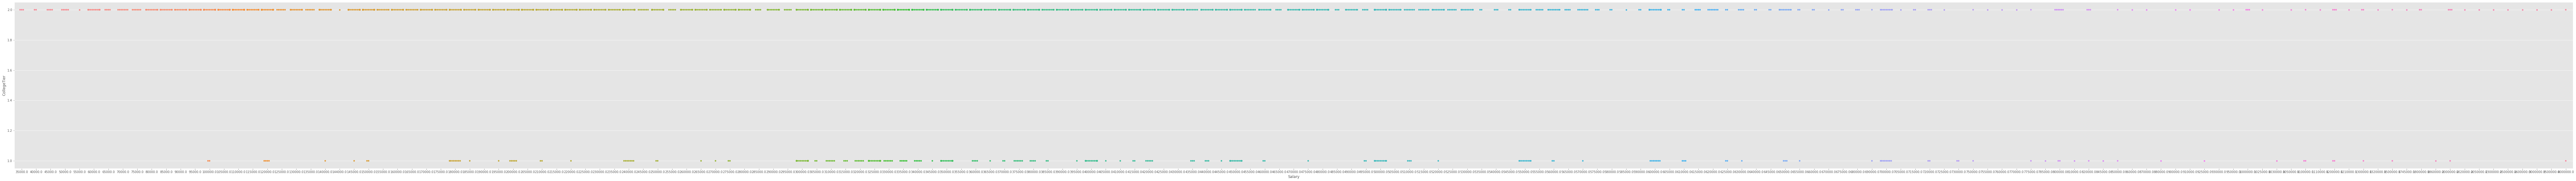

In [44]:
Biplots(df_new['Salary'],df_new['CollegeTier'])

Observations :

Candidates who have done graduation from Tier-2 college have higher salaries offered as compared to candidates belonging to Tier-1 college.

<AxesSubplot:xlabel='Salary', ylabel='Specialization'>

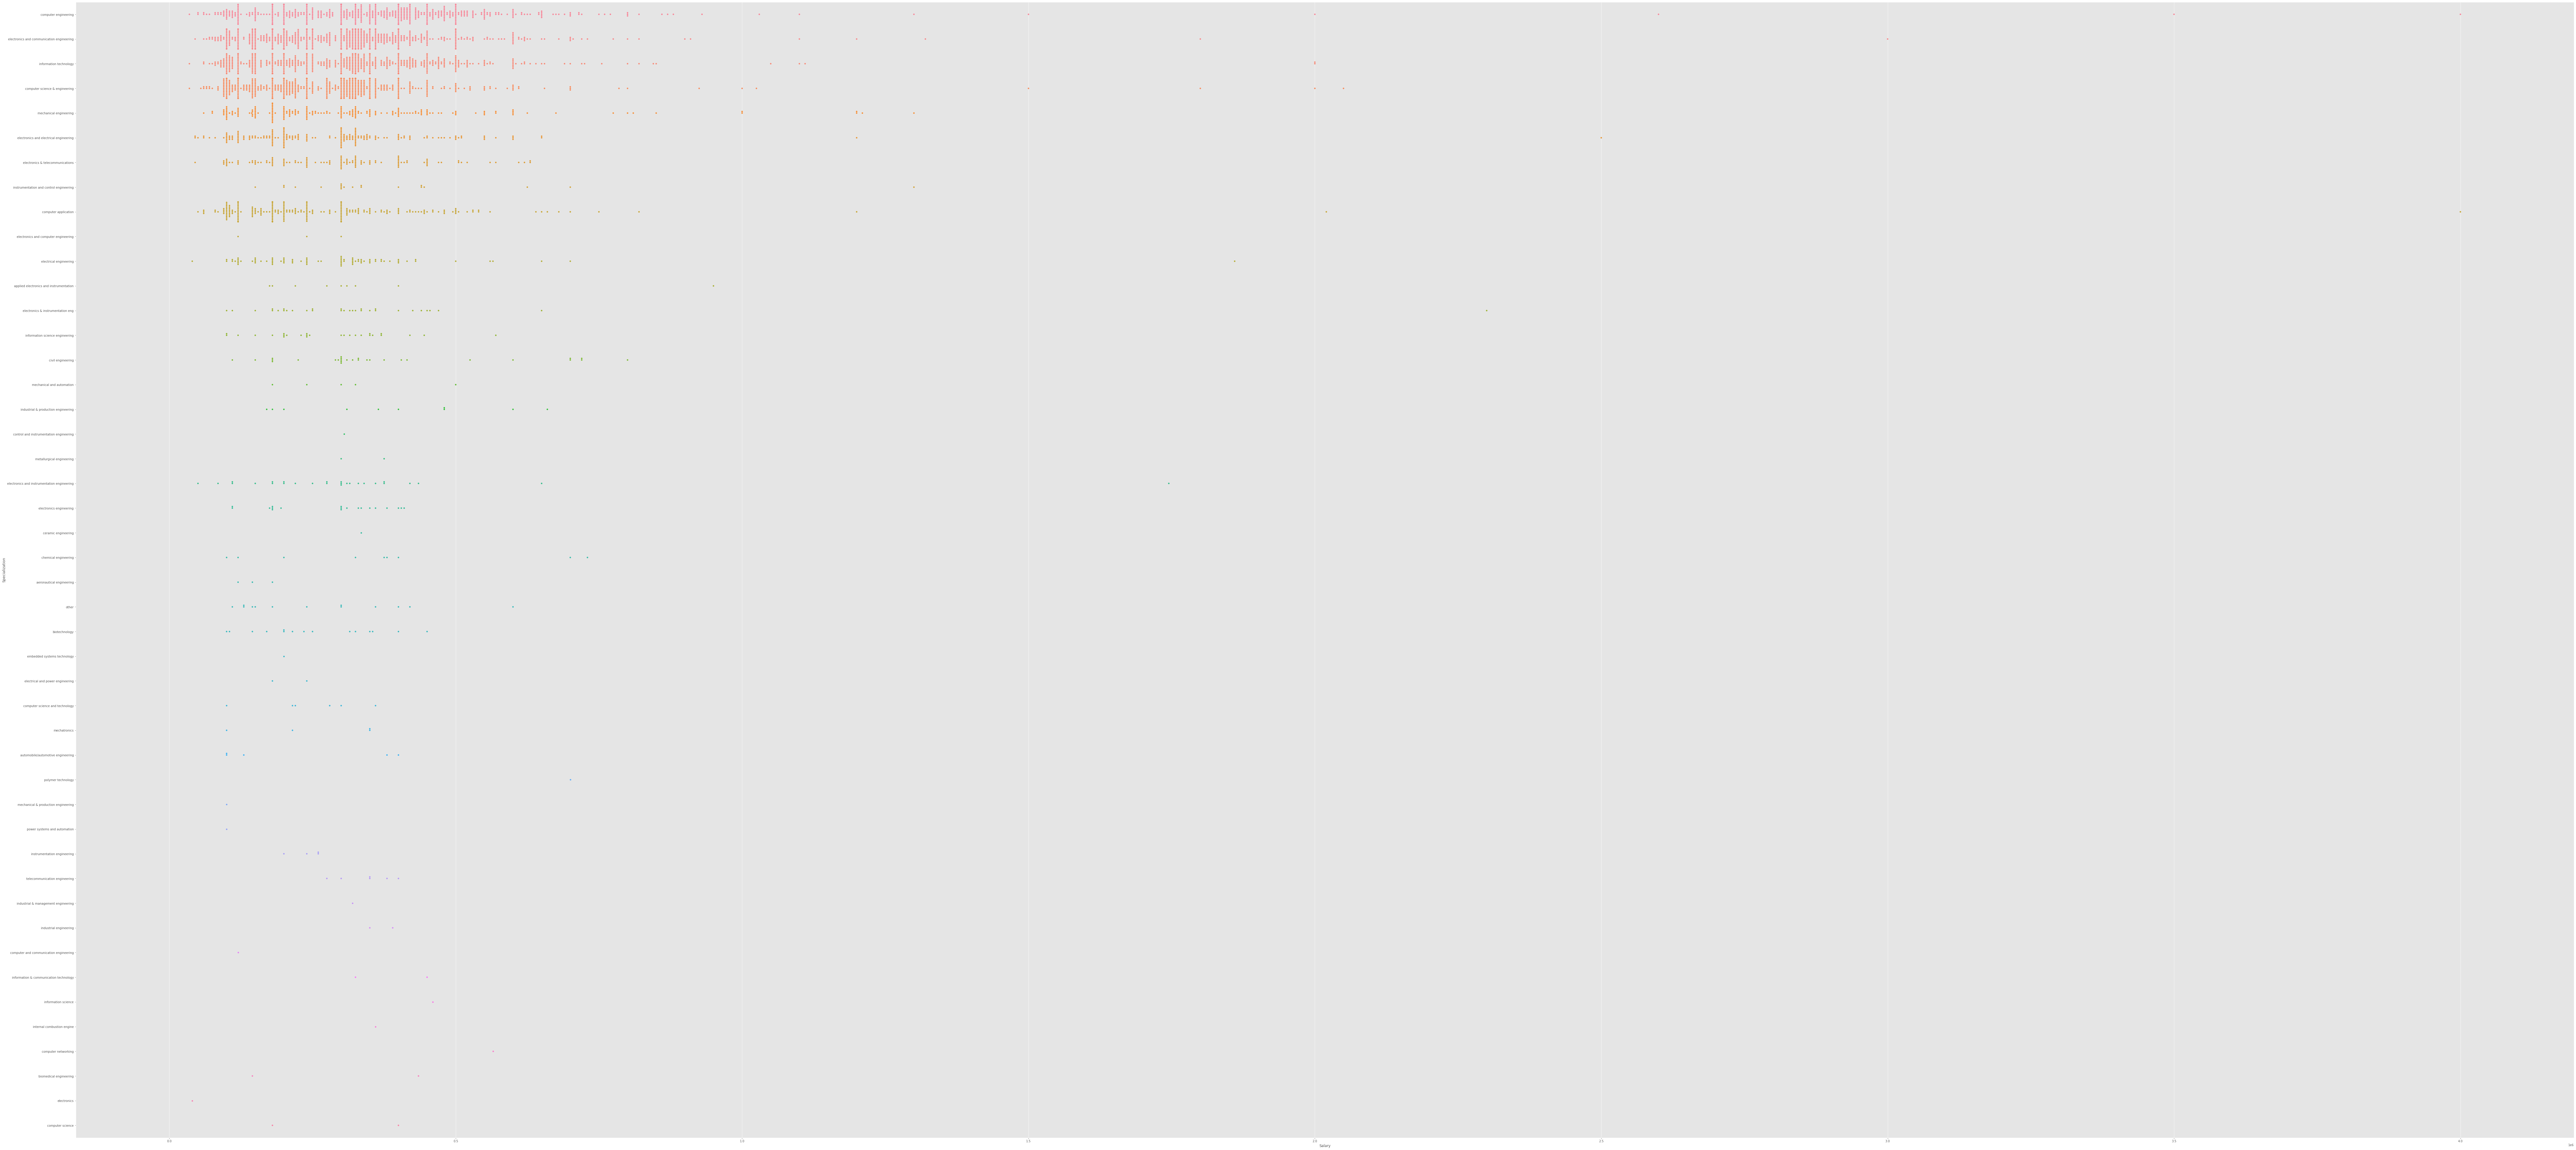

In [45]:
plt.figure(figsize=(150,70))
sns.swarmplot(df_new['Salary'],df_new['Specialization'])

Observations :

Candidates having specializtion in Computerscience, Electronics and communication,IT,Mechanical,Compterscience and Engg are having better salary around 1 million as compared to others.

In [46]:
px.scatter(df_new['Salary'],df_new['Designation'])

Observations :

Software engineer Designation has the highest salary and Senior quality engineer, assitant manager etc have lower pay range.

In [47]:
px.scatter(df_new['Salary'],df_new['JobCity'])

Observations :

Most of the people who have places are in the city of Banglore,Chennai,hydrabad,Noida,Pune and Asifabad has the lowest count.

In [52]:
df_1 = df_new[df_new.Specialization == 'computer science & engineering']

In [53]:
filter_1 = ['software engineer','programmer analyst','associate engineer','hardware engineer']

In [54]:
df_1

ID    Salary               DOJ               DOL  \
6      947847  300000.0  01-08-2014 00:00  01-05-2015 00:00   
18     711342  120000.0  01-01-2014 00:00  01-06-2014 00:00   
24     963123  335000.0  01-06-2014 00:00  01-06-2015 00:00   
25     350211  435000.0  01-09-2012 00:00           present   
31    1094324  340000.0  01-08-2014 00:00  01-04-2015 00:00   
...       ...       ...               ...               ...   
3969  1233826  330000.0  01-06-2015 00:00           present   
3975  1240207  300000.0  01-07-2014 00:00  01-04-2015 00:00   
3981  1077872  220000.0  01-09-2014 00:00           present   
3989  1204604  300000.0  01-09-2014 00:00           present   
3996   947111  200000.0  01-07-2014 00:00  01-01-2015 00:00   

                 Designation           JobCity Gender               DOB  \
6     java software engineer          Banglore      m  01-02-1993 00:00   
18       data entry operator           Gurgaon      m  07-12-1992 00:00   
24        programmer analyst         Hyderabad      m  28-06-1993 00:00   
25           systems analyst           Gurgaon      f  02-03-1991 00:00   
31         software engineer         Bangalore      m  23-10-1992 00:00   
...                      ...               ...    ...               ...   
3969      technical engineer              pune      m  24-01-1993 00:00   
3975          game developer             Noida      m  03-06-1991 00:00   
3981       software engineer           Gurgaon      m  17-12-1991 00:00   
3989       software engineer         Bangalore      m  23-11-1991 00:00   
3996      software developer  Asifabadbanglore      f  20-03-1992 00:00   

      10percentage      10board  ...  ComputerScience  MechanicalEngg  \
6            86.08  state board  ...              346              -1   
18           65.00  state board  ...               -1              -1   
24           88.00  state board  ...              346              -1   
25           86.80         cbse  ...              438              -1   
31           77.20  state board  ...              407              -1   
...            ...          ...  ...              ...             ...   
3969         76.00  state board  ...               -1              -1   
3975         86.00         cbse  ...               -1              -1   
3981         53.40         cbse  ...              530              -1   
3989         74.88  state board  ...              346              -1   
3996         78.72  state board  ...              438              -1   

     ElectricalEngg  TelecomEngg  CivilEngg conscientiousness agreeableness  \
6                -1           -1         -1            1.7081       -0.1054   
18               -1           -1         -1           -0.1590        0.3789   
24               -1           -1         -1            0.4155        0.8027   
25               -1           -1         -1            0.0464        1.2028   
31               -1           -1         -1           -0.0154        1.2114   
...             ...          ...        ...               ...           ...   
3969             -1           -1         -1            0.5591        0.7119   
3975             -1           -1         -1            0.5591        0.5454   
3981             -1           -1         -1            0.1282       -0.2871   
3989             -1           -1         -1            0.1282        0.0459   
3996             -1           -1         -1           -0.1590        0.0459   

      extraversion  nueroticism  openess_to_experience  
6          -1.0379      -2.0092                -1.0872  
18          1.3933      -0.2344                 1.4386  
24          0.1357      -0.9950                -0.6692  
25         -0.9245       0.5323                -0.2875  
31          1.0859      -1.5021                 0.2889  
...            ...          ...                    ...  
3969        0.0100      -0.2344                 0.8637  
3975        0.1637       0.3995                 0.4805  
3981       -0.

In [58]:
df_filtered = df_1[df_1['Designation'].isin(filter_1)]

In [59]:
df_filtered['Designation'].value_counts()

software engineer     139
programmer analyst     26
associate engineer      2
Name: Designation, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x20dd4d75f10>,
 'caps': [<matplotlib.lines.Line2D at 0x20dd51660a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20dd4d75970>],
 'medians': [<matplotlib.lines.Line2D at 0x20dd4d1e790>],
 'fliers': [<matplotlib.lines.Line2D at 0x20dd4d31a30>],
 'means': []}

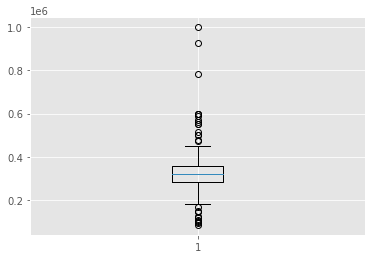

In [60]:
plt.boxplot(df_filtered['Salary'],)

In [61]:
np.max(df_filtered.Salary)  #maximum salary in the new dataframe

1000000.0

In [63]:
np.min(df_filtered.Salary)   #minimum salary in the new data frame

85000.0

In [74]:
Q1  = df_filtered.Salary.quantile(0.25)
Q3 = df_filtered.Salary.quantile(0.75)

In [75]:
IQR = Q3 - Q1

In [76]:
IQR

75000.0

In [77]:
upper_limit = Q3 + 1.5*IQR

In [78]:
upper_limit

472500.0

In [79]:
lower_limit = Q1 - 1.5*IQR

In [80]:
lower_limit

172500.0

Apparently the claim was if a candidate takes up Computerscience engg and finds job as a software engineer,programmer analyst,associate engineer,hardware engineer as a fresher he can earn upto 2.5 to 3 lakhs
which is a alternate hypothesis(H_0) and the Null hypothesis(H_1) will be that the candidate will earn more than 3 lakhs by taking the above mentioned course, So we need to perform hypothesis testing to find out if the claim made is right or wrong.

Question 1:

Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.” Test this claim with the data given to you.

In [86]:
population = df_filtered.Salary.values

In [88]:
population.shape

(167,)

In [90]:
sample = np.random.choice(population,50)

In [92]:
sample.shape

(50,)

Step 5 :

Hypothesis Testing

Alternate Hypothesis :
$$ H_1: \ salary < 3 Lakhs $$
Null Hypothesis : 
$$ H_0:salary \geq 3 Lakhs $$

In [94]:
population.mean()

331526.9461077844

In [98]:
population_dev = statistics.pstdev(population)

In [99]:
population_dev

125866.71090731591

In [103]:
population_mean = 331526.9461077844
Sample = sample
sample_mean = (sum(Sample)/len(Sample))
population_dev = 125866.71090731591
n = 50
sample_mean

316100.0

In [104]:
statistics.pstdev(population)

125866.71090731591

In [105]:
confidence_level = 0.90
alpha = 1 - confidence_level
print(alpha)

0.09999999999999998


In [106]:
numerator = sample_mean- population_mean
denominator  = population_dev/(50)**.5

In [107]:
z_score = numerator/denominator

In [108]:
z_score

-0.8666706333373901

In [113]:
z_critical = norm.ppf(1-alpha)

In [114]:
z_critical

1.2815515655446004

In [115]:
if(z_score < -z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


Conclusion :

Since there are 104 candidates out of 167 of selected category where they have opted computer science engg and they take up jobs like software engineer,programmer analyst,associate engineer,hardware engineer and they earn more than 3 lakhs on average as a fresher, So the claim was do they earn less than 3 lakhs that is why we are failing to reject the null hypothesis.
Apparently we dont have enough evidence to reject null hypothesis, hence we reject alternate hypothesis. 

Question 2 :

Is there a relationship between gender and specialisation? (i.e. Does the preference of
Specialisation depend on the Gender?


 Alternate Hypothesis:$$ H_1: They \ are \ Dependent $$and Null Hypothesis:$$ H_0: They \ are \ Independent $$

In [119]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [125]:
df_new.Gender.value_counts()

m    3041
f     957
Name: Gender, dtype: int64

In [126]:
df_new.Specialization.value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
information science engineering                 27
electronics and instrumentation engineering     27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

In [127]:
pd.crosstab(df_new.Specialization, df_new.Gender, margins=True)

Gender                                         f     m   All
Specialization                                              
aeronautical engineering                       1     2     3
applied electronics and instrumentation        2     7     9
automobile/automotive engineering              0     5     5
biomedical engineering                         2     0     2
biotechnology                                  9     6    15
ceramic engineering                            0     1     1
chemical engineering                           1     8     9
civil engineering                              6    23    29
computer and communication engineering         0     1     1
computer application                          59   185   244
computer engineering                         175   425   600
computer networking                            0     1     1
computer science                               1     1     2
computer science & engineering               183   561   744
computer science and technology                2     4     6
control and instrumentation engineering        0     1     1
electrical and power engineering               0     2     2
electrical engineering                        17    65    82
electronics                                    0     1     1
electronics & instrumentation eng             10    22    32
electronics & telecommunications              28    93   121
electronics and communication engineering    212   668   880
electronics and computer engineering           0     3     3
electronics and electrical engineering        34   162   196
electronics and instrumentation engineering    5    22    27
electronics engineering                        3    16    19
embedded systems technology                    0     1     1
industrial & management engineering            0     1     1
industrial & production engineering            2     8    10
industrial engineering                         1     1     2
information & communication technology         2     0     2
information science                            0     1     1
information science engineering                8    19    27
information technology                       173   487   660
instrumentation and control engineering        9    11    20
instrumentation engineering                    0     4     4
internal combustion engine                     0     1     1
mechanical & production engineering            0     1     1
mechanical and automation                      0     5     5
mechanical engineering                        10   191   201
mechatronics                                   1     3     4
metallurgical engineering                      0     2     2
other                                          0    13    13
polymer technology                             0     1     1
power systems and automation                   0     1     1
telecommunication engineering                  1     5     6
All                                          957  3041  3998

In [129]:
observed = pd.crosstab(df_new.Specialization, df_new.Gender)

In [131]:
chi2_contingency(observed)

(104.46891913608454,
 1.2453868176977011e-06,
 45,
 array([[7.18109055e-01, 2.28189095e+00],
        [2.15432716e+00, 6.84567284e+00],
        [1.19684842e+00, 3.80315158e+00],
        [4.78739370e-01, 1.52126063e+00],
        [3.59054527e+00, 1.14094547e+01],
        [2.39369685e-01, 7.60630315e-01],
        [2.15432716e+00, 6.84567284e+00],
        [6.94172086e+00, 2.20582791e+01],
        [2.39369685e-01, 7.60630315e-01],
        [5.84062031e+01, 1.85593797e+02],
        [1.43621811e+02, 4.56378189e+02],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.78091046e+02, 5.65908954e+02],
        [1.43621811e+00, 4.56378189e+00],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.96283142e+01, 6.23716858e+01],
        [2.39369685e-01, 7.60630315e-01],
        [7.65982991e+00, 2.43401701e+01],
        [2.89637319e+01, 9.20362681e+01],
        [2.10645323e+02, 6.69354677e+02],
        [7.18109055e-01, 

In [139]:
chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
df_2 = chi2_contingency(observed)[2]

In [137]:
confidence_level = 0.90

alpha_1 = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha_1, df_2)

chi2_critical

57.50530474499599

In [138]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


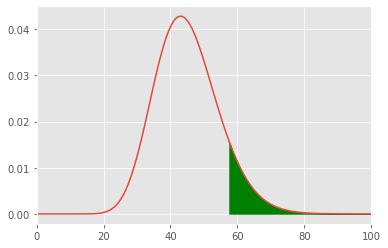

In [141]:
x_min = 0
x_max = 100
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, df)
plt.xlim(x_min, x_max)
plt.plot(x, y)
chi2_critical_right = chi2_critical
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, df)
plt.fill_between(x1, y1, color='green')

Conclusion :

Job specialization is dependent om gender, Here no.of men in each specialization is more as compared to women.